# ScreenBuddy

IA que permite recomendar películas de acuerdo a los gustos de otras personas.

# Temas a tratar

* Clasificación en ML.
* Tipos de clasificación.
* Aplicaciones.
* Análisis de sentimiento.
* Aprendizaje por clusterización.
* Pruebas y validaciones.
* Ajuste de modelos.
* Pruebas y validaciones.

# Objetivo

Desarrollar un modelo de inteligencia artificial (IA) llamado ScreenBuddy que, recomiende películas de acuerdo a las preferencias de otros usuarios con gustos similares (colaborativo)

# Problema

Los usuarios a menudo tienen dificultades para encontrar películas que se ajusten a sus preferencias específicas. Las recomendaciones generales basadas en intereses comerciales por parte de empresas como Google o Netflix, llevan a una experiencia de visualización insatisfactoria pues no recomiendan lo que uno quiere ver.

# Solución Propuesta

ScreenBuddy utiliza el algoritmo para analizar las preferencias del usuario en función de características relevantes de una película y lo que han opinado los otros usuarios de las mismas.

# Desarrollo

## Recopilación de datos

Para este caso hay varios métodos de creación de Datasets, como tomar uno ya existente o crear uno a partir de APIs y etiquetación manual. Para este caso en específico usaremos uno de los datasets de [Grouplens](https://grouplens.org/datasets/movielens/) con información de ratings y películas.

Para hacer el entrenamiento menos pesado y más rápido para la clase se usó el dataset más simple.

In [ ]:
# Descarga el dataset
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

# Descomprime
!unzip ml-latest-small.zip

--2024-04-29 12:19:57--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  4.02MB/s    in 0.2s    

2024-04-29 12:19:57 (4.02 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


## Análisis y preprocesamiento de los datos

### Análisis de los datos

In [ ]:
# Importamos dependencias
import pandas as pd

# Definimos nuestro archivo
ratings_file = "/content/ml-latest-small/ratings.csv"

# Cargamos el dataset
df = pd.read_csv(ratings_file, encoding='utf-8')

# Analizamos los datos
# Imprime las primeras 5 líneas del dataset.
print(df.head())

# Obtiene estadísticas relevantes para el dataset.
print(df.describe())

# Obtine información del dataset como tipos de datos o si hay valores nulos
print(df.info())

# Cuenta usuarios únicos
print("Usuarios:", df['userId'].nunique())

# Cuenta películas únicas
print("Películas:", df['movieId'].nunique())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   ---

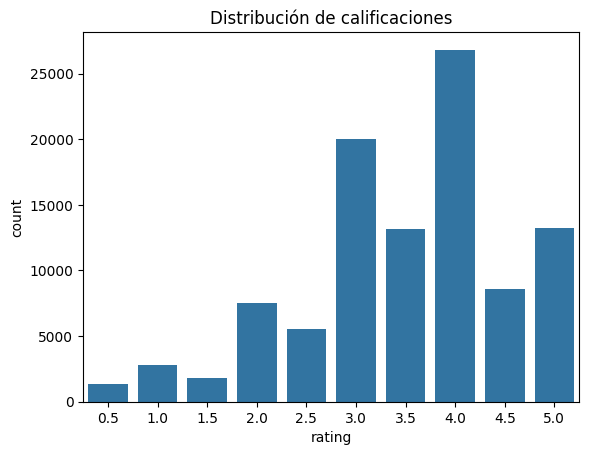

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vemos la distribución de los ratings
sns.countplot(x="rating", data=df)
plt.title("Distribución de calificaciones", fontsize=12)
plt.show()

In [ ]:
# Vemos las películas más rankeadas
df['movieId'].value_counts()[0:10]

movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: count, dtype: int64

Parece que esto no nos da mucha información, juntemos el dataset de movies para mejorar este análisis.

In [ ]:
# Definimos nuestro archivo
movies_file = "/content/ml-latest-small/movies.csv"

# Cargamos el archivo
movies_df = pd.read_csv(movies_file, encoding='utf-8')

# Revisamos qué tiene movies
print(movies_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [ ]:
# Juntamos la rabla ratings con movies con movieId
movies_ratings = df.merge(movies_df, on='movieId')

#Vemos las películas más rankeadas
movies_ratings['title'].value_counts()[0:10]

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

Hay muchos más análisis qué podríamos hacer, como ver cuáles son las películas más amadas u odidadas aplicando un promedio bayesiano para igualar las películas con muchos votos con las que no tienen tantos. Si quiere lo hace, pero se escapa del contenido de la materia.

Vamos a desglosa cada uno de los análisis.

1. Tenemos una columna con los usuarios, las películas, el rating asignado a esa película y una fecha.

2. Hay 100836 registros, que pertenecen a 610 usuarios que rankearon 9724 películas.

3. El rating va del 0.5 al 5, siendo la mediana 3.5. Pareciendo seguir una distribución normal en torno a la media de 3.501 según el gráfico visto.

4. No hay valore nulos.

5. Las películas más calificadas son de los 90, siendo Forrest Gump la más votada.

El dataset está limpio, pero vamos a revisar que un usuario no haya evaluado dos veces a la misma película.

In [ ]:
# Verificamos que no existan una película rankeada dos veces por el mismo usuario

# Cuenta el número de registros por usuario y película
df_counts = df.groupby(['userId', 'movieId']).size().reset_index(name='count')

# Verifica si hay registros duplicados
if df_counts['count'].max() > 1:
  print("Hay películas rankeadas dos veces por el mismo usuario.")
else:
  print("No hay películas rankeadas dos veces por el mismo usuario.")

No hay películas rankeadas dos veces por el mismo usuario.


Pefecto, ya podemos continuar.

### Selección de entradas y salidas

Para este caso se decidió resolver el problema con el ranking que los usuarios le pusieron a la película siendo un sistema de recomendación **colaborativo**, no obstante esto se puede hacer por otros factores como las etiquetas que estan en el archivo tags.csv permitiendo crear un sistema de recomendación por **contenido**

En fin, como entradas al modelo estaría el usuario, la película y la calificación, para que el modelo aprenda a relacionar estas variables.

A continuación se presenta las diferencias entre filtros colaborativos vs por contenido.

#### Filtrado colaborativo

* Enfoque: Se basa en la similitud entre usuarios o elementos para realizar recomendaciones.

* Funcionamiento:
    * Vecinos cercanos: Busca usuarios con gustos similares al usuario objetivo y recomienda elementos que ellos han calificado positivamente.
    * Factorización de matrices: Representa las interacciones usuario-elemento en una matriz y la descompone en factores que revelan preferencias e intereses.

* Ventajas:

  * Puede descubrir preferencias ocultas del usuario.
  * No requiere información explícita sobre el contenido.

* Desventajas:
  * Requiere una gran cantidad de datos para funcionar correctamente.
  * Puede ser susceptible a la "burbuja de filtro", donde solo se recomiendan elementos similares a los ya conocidos por el usuario.
  
#### Basados en contenido:

* Enfoque: Se basa en las características del contenido para recomendar elementos que sean similares a los que el usuario ha gustado en el pasado.

* Funcionamiento:
  * Análisis del contenido: Extrae características de los elementos (género, tema, palabras clave, etc.)
  * Comparación con el perfil del usuario: Se compara el contenido con las preferencias del usuario para encontrar coincidencias.
* Ventajas:
  * Puede ser utilizado con poca cantidad de datos.
  * Es más transparente y explicable que el filtrado colaborativo.
* Desventajas:
  * No puede descubrir preferencias que no se hayan manifestado explícitamente.
  * Requiere un buen análisis del contenido para obtener características relevantes.

El filtrado colaborativo es más efectivo cuando hay muchos datos disponibles y se busca descubrir preferencias ocultas.
Los modelos basados en contenido son más adecuados cuando hay poca información disponible o se busca una mayor transparencia en las recomendaciones.
Ejemplos de aplicaciones:

Filtrado colaborativo: Netflix, Spotify, Amazon
Basados en contenido: Pinterest, YouTube, Google News

### Preprocesamiento de los datos

Necesitamos crear una matriz de utilidad, donde cada usuario sería una fila, y cada película una columna. Estas matrices se usan en el filtrado colaborativo para mostrar las interacciones (valor) entre usuarios (filas) y elementos (columnas)

<img src="https://recommender-tutorial.s3-us-west-2.amazonaws.com/images/user_movie_matrix.png" width=50%/>

In [ ]:
# Definimos las dimensiones de la matriz
users_count = df['userId'].nunique()
movies_count = df['movieId'].nunique()

print(users_count, movies_count)

610 9724


In [ ]:
import numpy as np

# Creamos un par de tablas hash.
# Aquí para cada user_id almacenaremos la fila en el que se encuentra dentro de la matriz
user_mapper = dict(zip(np.unique(df["userId"]), list(range(users_count))))
# En cambio aquí almacenaremos para cada movie_id el índice de la columna en la que se encuentra dentro de la matriz
movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(movies_count))))

print(user_mapper)
print(movie_mapper)

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119, 121: 120, 122: 12

In [ ]:
# También tomamos los mapas inversos dónde para cada índice guardamos el id que puede que necesitemos más adelante para
# traducir resultados
user_inv_mapper = dict(zip(list(range(users_count)), np.unique(df["userId"])))
movie_inv_mapper = dict(zip(list(range(movies_count)), np.unique(df["movieId"])))

print(user_inv_mapper)
print(movie_inv_mapper)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 119: 120, 120: 121, 121: 12

In [ ]:
# Para cada user_id, obtenemos el índice desde la tabla hash
user_index = [user_mapper[i] for i in df['userId']]
# Para cada movie_id, obtenemos el índice desde la tabla hash
item_index = [movie_mapper[i] for i in df['movieId']]

print(len(user_index), user_index)
print(len(item_index), item_index)

100836 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
from scipy.sparse import csr_matrix

# Ahora ya podemos crear la matrix de utilidad
utility_matrix = csr_matrix((df["rating"], (user_index,item_index)), shape=(users_count,movies_count))

print(utility_matrix.shape)
print(utility_matrix)

(610, 9724)
  (0, 0)	4.0
  (0, 2)	4.0
  (0, 5)	4.0
  (0, 43)	5.0
  (0, 46)	5.0
  (0, 62)	3.0
  (0, 89)	5.0
  (0, 97)	4.0
  (0, 124)	5.0
  (0, 130)	5.0
  (0, 136)	5.0
  (0, 184)	5.0
  (0, 190)	3.0
  (0, 197)	5.0
  (0, 201)	4.0
  (0, 224)	5.0
  (0, 257)	3.0
  (0, 275)	3.0
  (0, 291)	5.0
  (0, 307)	4.0
  (0, 314)	4.0
  (0, 320)	5.0
  (0, 325)	4.0
  (0, 367)	3.0
  (0, 384)	4.0
  :	:
  (609, 9238)	5.0
  (609, 9246)	4.5
  (609, 9256)	4.0
  (609, 9268)	5.0
  (609, 9274)	3.5
  (609, 9279)	3.5
  (609, 9282)	3.0
  (609, 9288)	3.0
  (609, 9304)	3.0
  (609, 9307)	2.5
  (609, 9312)	4.5
  (609, 9317)	3.0
  (609, 9324)	3.0
  (609, 9339)	4.0
  (609, 9341)	4.0
  (609, 9348)	3.5
  (609, 9371)	3.5
  (609, 9372)	3.5
  (609, 9374)	5.0
  (609, 9415)	4.0
  (609, 9416)	4.0
  (609, 9443)	5.0
  (609, 9444)	5.0
  (609, 9445)	5.0
  (609, 9485)	3.0


csr_matrix crea una Compressed Sparse Row matrix, que es lo que buscamos. La función toma la serie creada a partir de la columna *rating* y crea la matriz a parti de las filas y culumnas. Ejemplo:

El usuario de id 1, fue asignado a la posición 0 (fila). La película por la cual votó (1) está en la posición 0 (columna). Entonces csr en la posición 0,0 inserta el ranking 4.0.

Con esta matriz es fácil hacer algunas operaciones, como saber cuantas calificaciones tiene la película con más calificaciones, las calificaciones del usuario con más votos, etc.

In [ ]:
# Vemos la película más rankeada
most_rated_movie_vote_count = utility_matrix.getnnz(axis=0).max()

# El usuario con más votos
user_with_highest_activity_count = utility_matrix.getnnz(axis=1).max()

print(f'# de interacciones para la película con más rankings {most_rated_movie_vote_count}')
print(f'# de interacciones para usuario con más rankings {user_with_highest_activity_count}')

# de interacciones para la película con más rankings 329
# de interacciones para usuario con más rankings 2698


Wow, parece que casi 3% del dataset pertenece a las calificaciones de uno de los 610 usuarios.

## Implementación y entrenamiento de modelos

### Selección de modelo

Como vimos al seleccionar entradas y salidas, los algoritmos de recomendación colaborativos tienen dos principales enfoques, por vecinos cercanos o por tablas de factorización. Para este caso usaremos vecinos cercanos, probablemente el algoritmo más popular e importante de clusterización y clasificación tanto etiquetada como no etiquetada.

Hay varios [algoritmos de vecinos cercanos ](https://scikit-learn.org/stable/modules/neighbors.html). Para este caso, queremos saber la relación entre datos en una nube de datos dispersa, por lo que usaremos un mecanismo de aprendizaje no supervisado donde el propio modelo se encargará de ajustarse a los ditintos clusters.

### Implementación y entrenamiento

In [ ]:
from sklearn.neighbors import NearestNeighbors

def get_similar_movies(movie_id: int, utility_matrix, movie_mapper, movie_inv_mapper, k = 10, metric = 'cosine' ):
    """
    Obtiene las k películas más cercanas a la indicada

    Args:
        movie_id: id de la película a elegir
        utility_matrix: la matriz de utilidad
        movie_mapper: diccionario con el índice en la matriz de utilidad para cada id
        movie_inv_mapper: diccionario con cada id de película para cada índice de la matriz.
        k: número de películas similares a retornar
        metric: métrica usada por KNN.

    Output: Retorna los ids de las películas
    """
    # Nuestro input son las películas, así que transponemos
    X = utility_matrix.T

    # Aquí guardamos los resultados que tengamos.
    neighbours = []

    # Obtenemos el índice de la película en la matrix de utilidad.
    movie_index = movie_mapper[movie_id]

    # Ya sabiendo el índice, podemos retornar la fila entera
    movie_vec = X[movie_index]
    # En movie_vec están solo las calificaciones de la película movie_id dadas por los usuarios.

    # Usamos k + 1, porque el vecino más cercano es la misma película
    knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)

    # Entrenamos en base a todas las películas
    knn.fit(X)

    # Obtenemos los vecinos a las calificaciones de la película elegida
    neighbour = knn.kneighbors(movie_vec, return_distance=False)

    # Para cada vecino del 1 al k + 1 (el 0 es la misma película)
    for i in range(1, k + 1):

      # Obtenemos el índice de la película recomendada en la matriz
      n = neighbour.item(i)

      # Obtenemos el id de esa película
      recommendated_movie_id = movie_inv_mapper[n]

      # La añadimos a la lista
      neighbours.append(recommendated_movie_id)
    return neighbours

get_similar_movies(1, utility_matrix, movie_mapper, movie_inv_mapper)

[3114, 480, 780, 260, 356, 364, 1210, 648, 1265, 1270]

Listo, tenemos nuestro recomendador funcionando, pero con ids no se entiende mucho, vamos a mostrar los títulos.

In [ ]:
# Creamos la tabla hash con clave id y valor título
movie_titles = dict(zip(movies_df['movieId'], movies_df['title']))

# Mostramos la película
print(f'Película: {movie_titles[1]}')

# Obtenemos las películas similares
similar_movies = get_similar_movies(1, utility_matrix, movie_mapper, movie_inv_mapper)

# Para cada Id mostramos el título
print('Recomendaciones: ', [movie_titles[id] for id in similar_movies])

Película: Toy Story (1995)
Recomendaciones:  ['Toy Story 2 (1999)', 'Jurassic Park (1993)', 'Independence Day (a.k.a. ID4) (1996)', 'Star Wars: Episode IV - A New Hope (1977)', 'Forrest Gump (1994)', 'Lion King, The (1994)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Mission: Impossible (1996)', 'Groundhog Day (1993)', 'Back to the Future (1985)']


## Análisis de resultados

Parece que nuestro modelo está bien, haciendo que la primera recomendación para Toy Story sea Toy Story 2.

El modelo no es malo, pero claramente no es el mejor y tiene un severo problema llamado el inicio congelado o cold-start problem.

El cold-start problem sucede cuando un usuario completamente nuevo, o una película completamente nueva entra en escena. Pues al no haber interacciones el modelo simplemente no puede establacer relaciones de vecindad.

Para solucionarlo, lo mejor es combinar el filtro colaborativo, con otros filtros como por contenido, en este caso se podría conseguir las preferencias de un nuevo usuario en base a los géneros que le gusta, o se podría incluir una película y esta recomendar a los usuarios que le gustan dicho género.

## Despliegue del modelo

Ya con el modelo listo, nos gustaría hacer un programa donde dado el título de una película obtengamos películas similares.

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import process

# Todos los títulos de las películas
titles = movies_df['title'].tolist()

# Dicicionario con clave el nombre de la película y id como valor
ids = dict(zip(movies_df['title'], list(movies_df['movieId'])))

print(ids)

def find_by_name(title: str):
  """
  Obtiene el nombre e índice más parecido a un nombre
  """
  closest_match = process.extractOne(title,titles)[0]
  id = ids[closest_match]
  return closest_match, id

{'Toy Story (1995)': 1, 'Jumanji (1995)': 2, 'Grumpier Old Men (1995)': 3, 'Waiting to Exhale (1995)': 4, 'Father of the Bride Part II (1995)': 5, 'Heat (1995)': 6, 'Sabrina (1995)': 7, 'Tom and Huck (1995)': 8, 'Sudden Death (1995)': 9, 'GoldenEye (1995)': 10, 'American President, The (1995)': 11, 'Dracula: Dead and Loving It (1995)': 12, 'Balto (1995)': 13, 'Nixon (1995)': 14, 'Cutthroat Island (1995)': 15, 'Casino (1995)': 16, 'Sense and Sensibility (1995)': 17, 'Four Rooms (1995)': 18, 'Ace Ventura: When Nature Calls (1995)': 19, 'Money Train (1995)': 20, 'Get Shorty (1995)': 21, 'Copycat (1995)': 22, 'Assassins (1995)': 23, 'Powder (1995)': 24, 'Leaving Las Vegas (1995)': 25, 'Othello (1995)': 26, 'Now and Then (1995)': 27, 'Persuasion (1995)': 28, 'City of Lost Children, The (Cité des enfants perdus, La) (1995)': 29, 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)': 30, 'Dangerous Minds (1995)': 31, 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)': 32, 'Babe (1995)': 34, 'Dead M

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
find_by_name('forrest')

('Forrest Gump (1994)', 356)

Ya tenemos un helper para obtener el id y el título de acuerdo a lo que introduzca el usuario, vamos a juntarlo todo

In [ ]:
def recommend(movie: str):
  movie_name, movie_id = find_by_name(movie)
  similar_movies_ids = get_similar_movies(movie_id, utility_matrix, movie_mapper, movie_inv_mapper, k = 5)
  similar_movies = [{
      "id": int(id),
      "name": movie_titles[id]
  } for id in similar_movies_ids]
  return {
      "id": int(movie_id),
      "name": movie_name,
      "similar_movies": similar_movies
  }

In [ ]:
recommend('forrest')

{'id': 356,
 'name': 'Forrest Gump (1994)',
 'similar_movies': [{'id': 318, 'name': 'Shawshank Redemption, The (1994)'},
  {'id': 480, 'name': 'Jurassic Park (1993)'},
  {'id': 296, 'name': 'Pulp Fiction (1994)'},
  {'id': 110, 'name': 'Braveheart (1995)'},
  {'id': 593, 'name': 'Silence of the Lambs, The (1991)'}]}

Ahora solo hace falta crear una aplicación

In [ ]:
from IPython.display import IFrame
IFrame(src="https://projects.rolandoandrade.me/screenbuddy/", width=400, height=400)

In [ ]:
!pip install --ignore-installed Flask==3.0.0 pyngrok==7.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 26.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which 

In [ ]:
ngrok_key = "Coloca el token de ngrok aquí"
port = 5000

from pyngrok import ngrok

In [ ]:
ngrok.set_auth_token(ngrok_key)
ngrok.connect(port)

<NgrokTunnel: "https://e2ea-34-106-200-248.ngrok-free.app" -> "http://localhost:5000">

In [ ]:
from flask import Flask, request, jsonify, Response
import json

app = Flask(__name__)

@app.route("/")
def hello():
  movie_name = request.args.get('movie')
  data = recommend(movie_name)
  return Response(json.dumps(data), headers=[('Access-Control-Allow-Origin', '*')])

if __name__ == '__main__':
    app.run(port = port)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [29/Apr/2024 12:21:37] "GET /?movie=star%20wars HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [29/Apr/2024 12:21:47] "GET /?movie=forrest HTTP/1.1" 200 -


# Conclusiones

Con esta lección aprendiste más formas de manejo de datos y un nuevo y poderoso algoritmo de machine learning para agrupar elementos similares, los distintos acercamientos a el filtrado de recomendaciones y cómo usarlo en una aplicación real.

# La verdadera solución al problema

Pese a que KNN probablemente es de los mejores algoritmos para encontrar características comunes entre un grupo, las tablas de factorización y las tablas de factorización neurales son formas más cercanas a cómo se tratan los filtros colaborativos.

Por otro lado, prácticamente todos los algoritmos de recomendación mezclan los filtros colaborativos con los basados en contenido.

Finalmente, cabe destacar que existen otros algoritmos clásicos como el poderoso Naive Bayes que también puede ser útil para resolver este problema

# Tu turno

Resuelve el problema del cold-start utilizando una factorización en base a los géneros de las películas